# <font color='#eb3483'> Womxn in Big Data South Africa: Female-Headed Households in South Africa </font>

* Estimate the % of households per ward that are female-headed and living below an income threshold
* Examine how resources are unevenly distributed in SA

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Load data

In [2]:
df = pd.read_csv('Train.csv',index_col='ward')

## Exploratory data analysis

In [3]:
df.head()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
ward,,,,,,,,,,,,,,,,,,,,,
41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [4]:
df.columns

Index(['total_households', 'total_individuals', 'target', 'dw_00', 'dw_01',
       'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09',
       'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01', 'psa_02',
       'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00',
       'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05',
       'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12',
       'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04',
       'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06',
       'pw_07', 'pw_08', 'ADM4_PCODE', 'lat', 'lon', 'NL'],
      dtype='object')

<AxesSubplot:xlabel='target', ylabel='Density'>

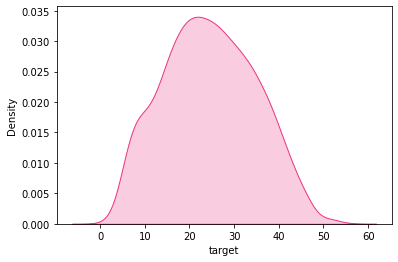

In [5]:
sns.kdeplot(df.target, color='#eb3483', shade=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 41601001: Ward 1 to 34503005: Ward 5
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_households   2822 non-null   float64
 1   total_individuals  2822 non-null   float64
 2   target             2822 non-null   float64
 3   dw_00              2822 non-null   float64
 4   dw_01              2822 non-null   float64
 5   dw_02              2822 non-null   float64
 6   dw_03              2822 non-null   float64
 7   dw_04              2822 non-null   float64
 8   dw_05              2822 non-null   float64
 9   dw_06              2822 non-null   float64
 10  dw_07              2822 non-null   float64
 11  dw_08              2822 non-null   float64
 12  dw_09              2822 non-null   float64
 13  dw_10              2822 non-null   float64
 14  dw_11              2822 non-null   float64
 15  dw_12              2822 non-null   int64  
 16  dw

Looks like there's no missing data

In [8]:
df_dropped = df.drop(['dw_12', 'dw_13','lan_13','pw_07', 'pw_08','stv_01','car_01','lln_01'],axis=1)

### Group variables

In [9]:
df_dropped['water_community']=df_dropped.pw_02+df_dropped.pw_03+df_dropped.pw_04+df_dropped.pw_05+df_dropped.pw_06
df_dropped['not_black']=df_dropped.pg_01+df_dropped.pg_02+df_dropped.pg_03+df_dropped.pg_04
df_dropped['not_white']=df_dropped.pg_01+df_dropped.pg_02+df_dropped.pg_00+df_dropped.pg_04
df_dropped['Euro_lang']=df_dropped.lan_00+df_dropped.lan_01
df_dropped['person_per_household'] = df_dropped.total_individuals/df_dropped.total_households

In [10]:
df_dropped.columns

Index(['total_households', 'total_individuals', 'target', 'dw_00', 'dw_01',
       'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09',
       'dw_10', 'dw_11', 'psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04',
       'stv_00', 'car_00', 'lln_00', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'ADM4_PCODE', 'lat', 'lon', 'NL', 'water_community',
       'not_black', 'not_white', 'Euro_lang', 'person_per_household'],
      dtype='object')

In [11]:
households = df_dropped[['dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11']]
languages = df_dropped[['lan_00', 'lan_01', 'lan_02',
       'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09',
       'lan_10', 'lan_11', 'lan_12', 'lan_14','Euro_lang']]
water = df_dropped[['pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04',
       'pw_05', 'pw_06']]
ethnicity = df_dropped[['pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04','not_black','not_white']]
education = df_dropped[['psa_00', 'psa_01',
       'psa_02', 'psa_03', 'psa_04']]

### Check correlation between variables

<AxesSubplot:>

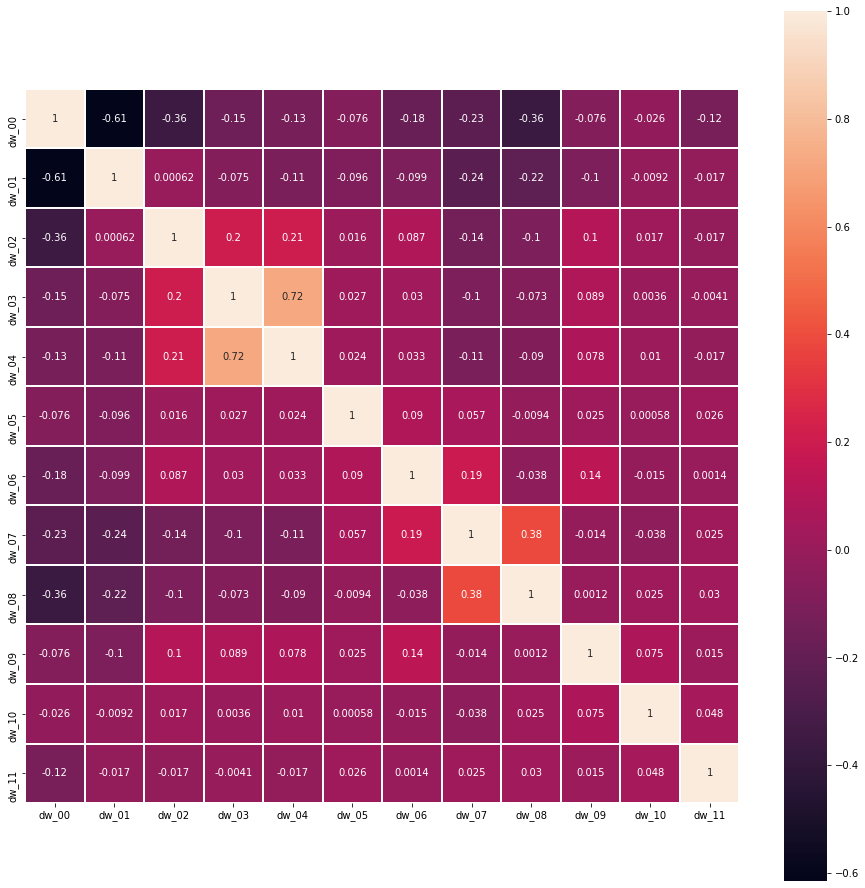

In [12]:
households_corr = households.corr()
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(households_corr, linewidths = 1, square= True, annot = True, ax=ax)

<AxesSubplot:>

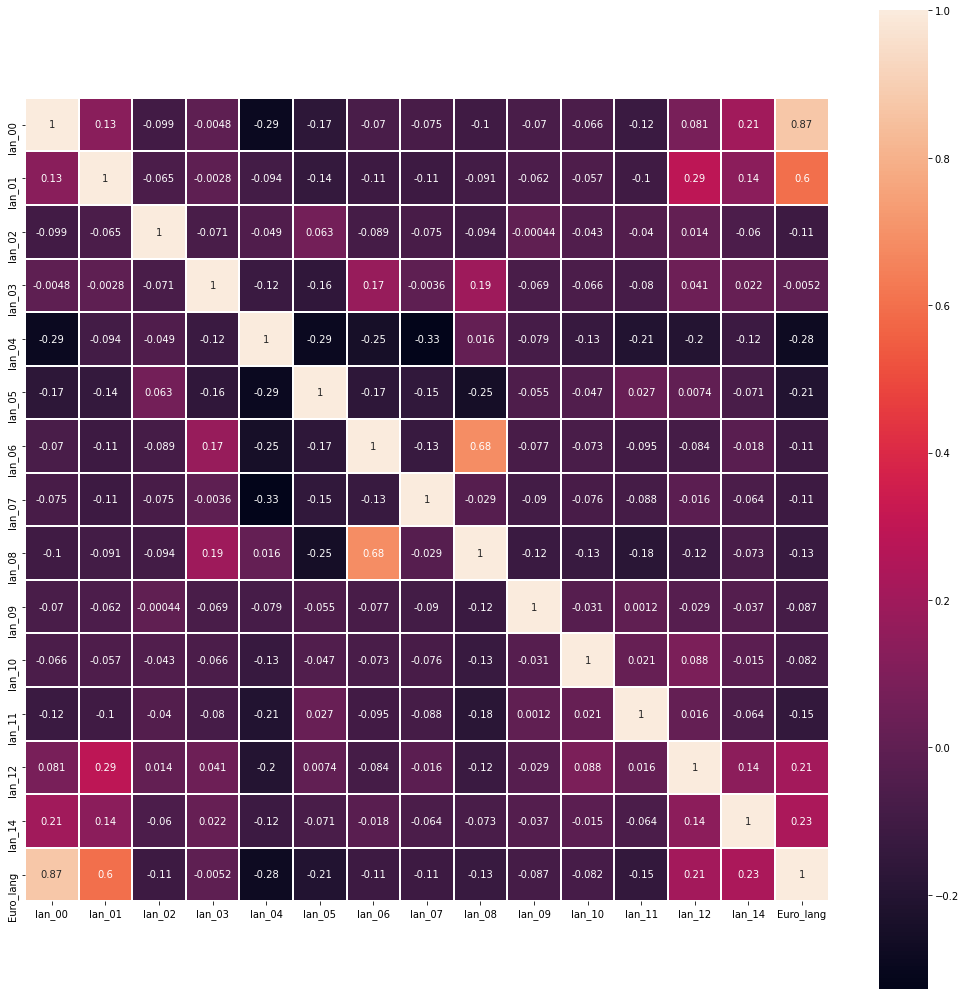

In [13]:
languages_corr = languages.corr()
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(languages_corr, linewidths = 1, square= True, annot = True, ax=ax)

<AxesSubplot:>

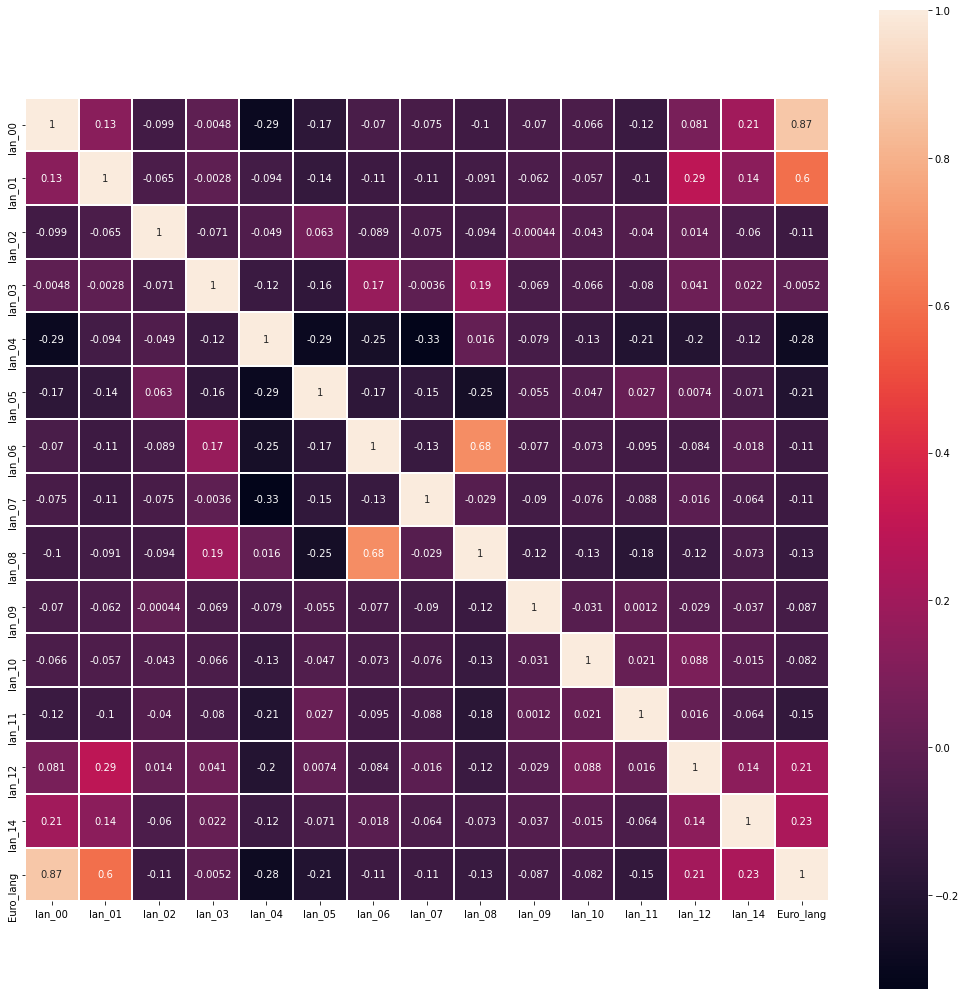

In [14]:
water_corr = water.corr()
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(languages_corr, linewidths = 1, square= True, annot = True, ax=ax)

<AxesSubplot:>

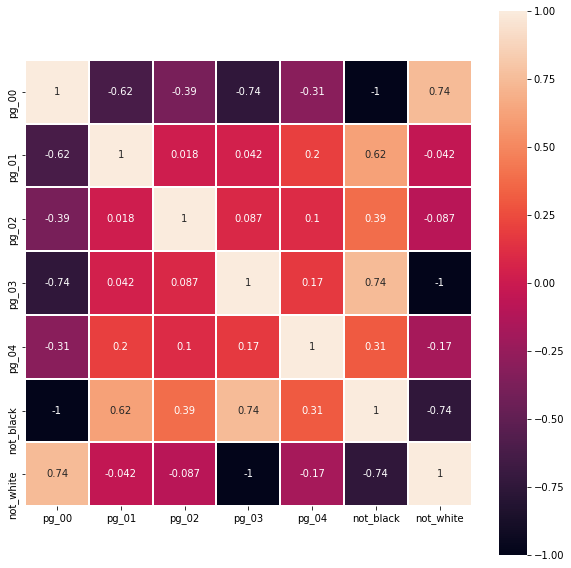

In [15]:
ethnicity_corr = ethnicity.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ethnicity_corr, linewidths = 1, square= True, annot = True, ax=ax)

<AxesSubplot:>

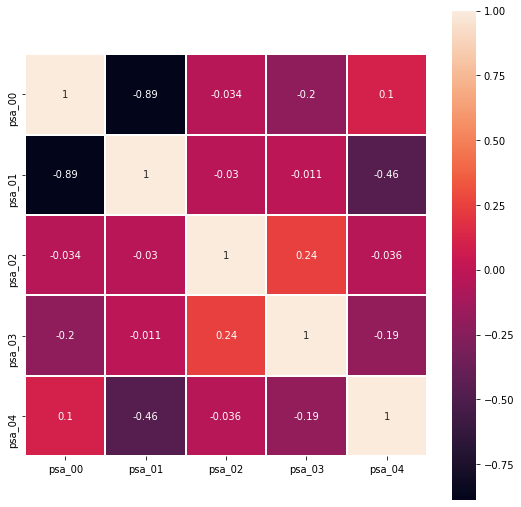

In [16]:
education_corr = education.corr()
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(education_corr, linewidths = 1, square= True, annot = True, ax=ax)

Strongest correlation with the target

In [17]:
df_dropped.corr()['target'].sort_values(ascending=False).head(15)

target             1.000000
psa_00             0.782472
water_community    0.643754
pg_00              0.613346
not_white          0.583908
pw_06              0.470676
dw_01              0.458206
pw_02              0.442441
pw_03              0.440941
pw_04              0.389467
pw_05              0.349653
lon                0.347088
lan_05             0.275263
lan_04             0.232266
lan_11             0.210597
Name: target, dtype: float64

Weakest correlation with the target

In [18]:
df_dropped.corr()['target'].sort_values(ascending=True).head(15)

pw_00              -0.754536
psa_01             -0.707506
car_00             -0.702831
stv_00             -0.664181
lln_00             -0.637835
Euro_lang          -0.626055
not_black          -0.613346
pg_03              -0.583908
NL                 -0.514398
lan_00             -0.507942
lan_01             -0.438704
dw_04              -0.385533
total_households   -0.374833
dw_03              -0.338137
lan_12             -0.325367
Name: target, dtype: float64

Mean of each feature

In [19]:
df_dropped.mean()

total_households         3665.281214
total_individuals       12869.130053
target                     24.507554
dw_00                       0.712196
dw_01                       0.092616
dw_02                       0.032043
dw_03                       0.006057
dw_04                       0.008665
dw_05                       0.006289
dw_06                       0.022375
dw_07                       0.039296
dw_08                       0.064586
dw_09                       0.006864
dw_10                       0.001112
dw_11                       0.007902
psa_00                      0.311268
psa_01                      0.526568
psa_02                      0.000541
psa_03                      0.033694
psa_04                      0.127929
stv_00                      0.225922
car_00                      0.250312
lln_00                      0.097637
lan_00                      0.097603
lan_01                      0.058684
lan_02                      0.029416
lan_03                      0.039983
l

In [20]:
# df_dropped.to_pickle('Train2.pkl')